In [10]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

In [11]:
NUM_GENES_PER_CLASS = 20
FIGURES_DIR = "../figures"

rng = np.random.default_rng()

# Create random split data

In [12]:
n_total = 421
n_eur = 344
n_yri = 77

n_test = 77
n_val = 17
n_train = n_total - n_test - n_val

random_split_data = np.zeros((NUM_GENES_PER_CLASS, 421))
random_split_data[:, n_train : n_train + n_val] = 1
random_split_data[:, n_train + n_val :] = 2

# Randomly shuffle across axis=1
random_split_data = rng.permuted(random_split_data, axis=1)

random_split_eur_data = random_split_data[:, :n_eur]
random_split_yri_data = random_split_data[:, n_eur:]

# Create population split data

In [13]:
population_split_eur_data = np.zeros((NUM_GENES_PER_CLASS, n_eur))
population_split_eur_data[:, n_train:] = 1
population_split_eur_data = rng.permuted(population_split_eur_data)

population_split_yri_data = np.full((NUM_GENES_PER_CLASS, n_yri), 2)

# Create unseen data

In [14]:
unseen_eur_data = np.full((NUM_GENES_PER_CLASS, n_eur), 2)
unseen_yri_data = np.full((NUM_GENES_PER_CLASS, n_yri), 2)

# Create plot

In [15]:
split_to_color = {"train": "#D1C4E9", "val": "#FFF9C4", "test": "#C8E6C9"}

In [16]:
def insert_ellipsis_row(data: np.ndarray):
    m = data.shape[0]
    assert m % 2 == 0
    top = data[: m // 2]
    end = data[m // 2 :]
    return np.vstack([top, np.full((1, data.shape[1]), np.nan), end])


def add_ellipsis_to_heatmap(data: np.ndarray, ax: plt.Axes):
    m, n = data.shape
    y_pos = m // 2 - 0.25
    x_pos = n / 2
    ax.text(x_pos, y_pos, "...", ha="center", va="center", fontsize=12, color="black")

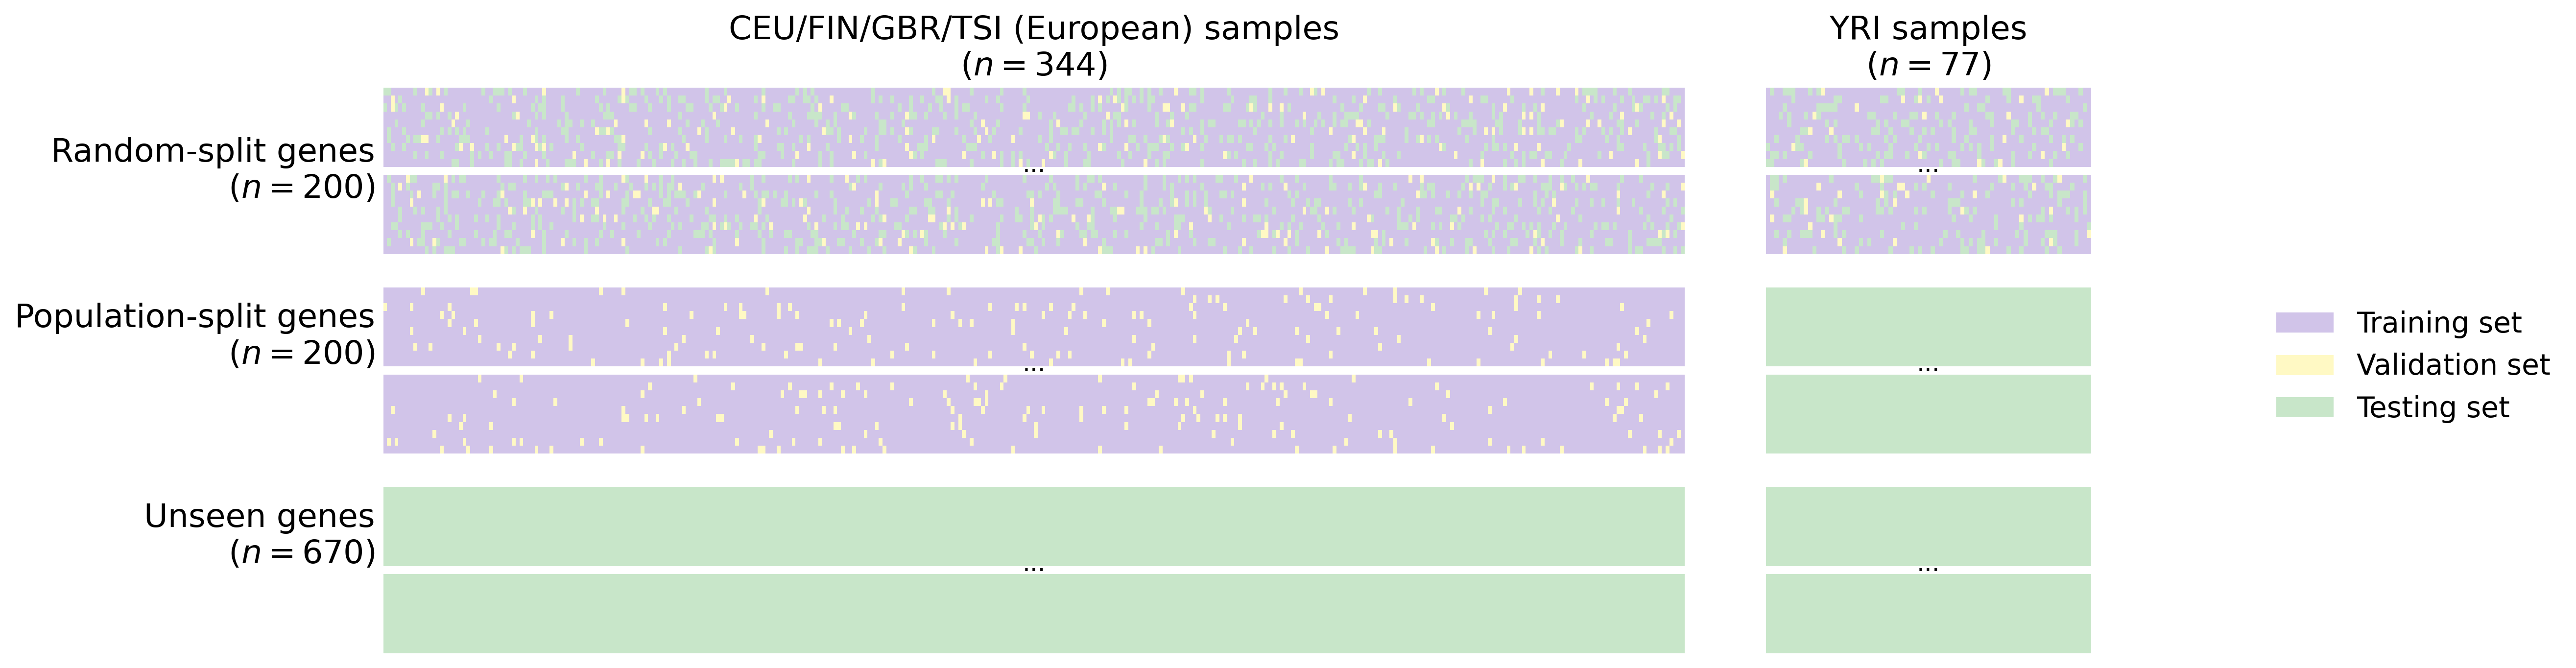

In [17]:
# Adjusting the heatmaps according to the new requirements
fig, ax = plt.subplots(
    3,
    2,
    figsize=(15, 5),
    dpi=300,
    gridspec_kw={"width_ratios": [20, 5], "wspace": 0.1, "hspace": 0.2},
)

# (1) Random-split genes
random_split_eur_data_with_ellipsis = insert_ellipsis_row(random_split_eur_data)
random_split_yri_data_with_ellipsis = insert_ellipsis_row(random_split_yri_data)

sns.heatmap(
    random_split_eur_data_with_ellipsis,
    ax=ax[0, 0],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette(
        [split_to_color["train"], split_to_color["val"], split_to_color["test"]]
    ),
)
add_ellipsis_to_heatmap(random_split_eur_data_with_ellipsis, ax[0, 0])
ax[0, 0].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the first heatmap
ax[0, 0].set_ylabel(
    "Random-split genes" + "\n" + r"($n=200$)",
    rotation="horizontal",
    ha="right",
    fontsize=16,
    va="center",
)
ax[0, 0].set_title(
    "CEU/FIN/GBR/TSI (European) samples" + "\n" + r"($n=344$)", fontsize=16
)

sns.heatmap(
    random_split_yri_data_with_ellipsis,
    ax=ax[0, 1],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette(
        [split_to_color["train"], split_to_color["val"], split_to_color["test"]]
    ),
)
add_ellipsis_to_heatmap(random_split_yri_data_with_ellipsis, ax[0, 1])
ax[0, 1].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the second heatmap
ax[0, 1].set_title("YRI samples" + "\n" + r"($n=77$)", fontsize=16)

# (2) Population-split genes
population_split_eur_data_with_ellipsis = insert_ellipsis_row(population_split_eur_data)
population_split_yri_data_with_ellipsis = insert_ellipsis_row(population_split_yri_data)

sns.heatmap(
    population_split_eur_data_with_ellipsis,
    ax=ax[1, 0],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette([split_to_color["train"], split_to_color["val"]]),
)
add_ellipsis_to_heatmap(population_split_eur_data_with_ellipsis, ax[1, 0])
ax[1, 0].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the first heatmap
ax[1, 0].set_ylabel(
    "Population-split genes" + "\n" + r"($n=200$)",
    rotation="horizontal",
    ha="right",
    fontsize=16,
)

sns.heatmap(
    population_split_yri_data_with_ellipsis,
    ax=ax[1, 1],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette([split_to_color["test"]]),
)
add_ellipsis_to_heatmap(population_split_yri_data_with_ellipsis, ax[1, 1])
ax[1, 1].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the second heatmap

# (3) Unseen genes
unseen_eur_data_with_ellipsis = insert_ellipsis_row(unseen_eur_data)
unseen_yri_data_with_ellipsis = insert_ellipsis_row(unseen_yri_data)

sns.heatmap(
    unseen_eur_data_with_ellipsis,
    ax=ax[2, 0],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette([split_to_color["test"]]),
)
add_ellipsis_to_heatmap(unseen_eur_data_with_ellipsis, ax[2, 0])
ax[2, 0].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the first heatmap
ax[2, 0].set_ylabel(
    "Unseen genes" + "\n" + r"($n=670$)", rotation="horizontal", ha="right", fontsize=16
)

sns.heatmap(
    unseen_yri_data_with_ellipsis,
    ax=ax[2, 1],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette([split_to_color["test"]]),
)
add_ellipsis_to_heatmap(unseen_yri_data_with_ellipsis, ax[2, 1])
ax[2, 1].tick_params(
    top=True, labeltop=True, bottom=False, labelbottom=False
)  # Moving xaxis ticks to the top for the second heatmap

# Add a legend
legend_elements = [
    Patch(facecolor=split_to_color["train"], label="Training set"),
    Patch(facecolor=split_to_color["val"], label="Validation set"),
    Patch(facecolor=split_to_color["test"], label="Testing set"),
]
fig.legend(
    handles=legend_elements,
    loc="center right",
    bbox_to_anchor=(1.12, 0.5),
    frameon=False,
    fontsize=14,
)

plt.savefig(os.path.join(FIGURES_DIR, "data_split.pdf"), bbox_inches="tight")
plt.show()